# American Census

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

### Load data

In [3]:
X_train = pd.read_csv("AmericanCensus/X_train.csv")
y_train = pd.read_csv("AmericanCensus/y_train.csv")

X_test = pd.read_csv("AmericanCensus/X_test.csv")

### Data exploration

#### Question 3.1.1

In [4]:
# Aim to keep your answers structured for the reviewers
numbers = [1, 2, 3]

### Data preparation

#### Question 3.2.1

In [5]:
result = pd.concat([X_train, X_test])
age_mean = result["age"].mean()
education_mean = result["education-num"].mean()
hours_mean = result["hours-per-week"].mean()

In [6]:
X_train["age"].fillna(age_mean, inplace=True)
X_train["education-num"].fillna(education_mean, inplace=True)
X_train["hours-per-week"].fillna(hours_mean, inplace=True)
X_train["workclass"].fillna("unknown", inplace=True)
X_train["education"].fillna("unknown", inplace=True)
X_train["marital-status"].fillna("unknown", inplace=True)
X_train["occupation"].fillna("unknown", inplace=True)
X_train["relationship"].fillna("unknown", inplace=True)
X_train["race"].fillna("unknown", inplace=True)
X_train["sex"].fillna("unknown", inplace=True)
X_train["native-country"].fillna("unknown", inplace=True)

X_train

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,30,9.0,40,Private,HS-grad,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Female,United-States
1,77,10.0,6,unknown,Some-college,Married-civ-spouse,unknown,Husband,White,Male,United-States
2,44,12.0,50,Private,Assoc-acdm,Never-married,Prof-specialty,Unmarried,Black,Female,United-States
3,53,10.0,50,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
4,41,10.0,40,Federal-gov,Some-college,Married-civ-spouse,Transport-moving,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...,...,...,...
16275,31,11.0,30,Private,Assoc-voc,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
16276,37,13.0,40,State-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
16277,45,14.0,40,State-gov,Masters,Divorced,Exec-managerial,Unmarried,White,Female,United-States
16278,32,9.0,40,Private,HS-grad,Never-married,Machine-op-inspct,Not-in-family,White,Male,United-States


In [7]:
X_test["age"].fillna(age_mean, inplace=True)
X_test["education-num"].fillna(education_mean, inplace=True)
X_test["hours-per-week"].fillna(hours_mean, inplace=True)
X_test["workclass"].fillna("unknown", inplace=True)
X_test["education"].fillna("unknown", inplace=True)
X_test["marital-status"].fillna("unknown", inplace=True)
X_test["occupation"].fillna("unknown", inplace=True)
X_test["relationship"].fillna("unknown", inplace=True)
X_test["race"].fillna("unknown", inplace=True)
X_test["sex"].fillna("unknown", inplace=True)
X_test["native-country"].fillna("unknown", inplace=True)

X_test

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,74,10.0,40,Self-emp-inc,Some-college,Widowed,Exec-managerial,Unmarried,White,Male,United-States
1,17,8.0,15,Private,12th,Never-married,Handlers-cleaners,Own-child,White,Male,United-States
2,60,10.0,32,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,Other,Male,United-States
3,62,9.0,42,Private,HS-grad,Widowed,Adm-clerical,Not-in-family,White,Female,United-States
4,52,10.0,65,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...,...
14742,30,12.0,50,Private,Assoc-acdm,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
14743,27,12.0,40,Private,Assoc-acdm,Never-married,Exec-managerial,Not-in-family,White,Male,United-States
14744,39,9.0,40,State-gov,HS-grad,Never-married,Other-service,Not-in-family,Black,Male,United-States
14745,36,9.0,45,Local-gov,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


#### Question 3.2.2


In [8]:
workclass_list = {
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"
}
education_list = {
    "Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc", "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", "Doctorate", "5th-6th", "Preschool"
}
marital_list = {
    "Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", "Married-spouse-absent", "Married-AF-spouse"
}
occupation_list = {
    "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"
}
relationship_list = {
    "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
}
race_list = {
    "White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"
}
sex_list = {
    "Male", "Female" 
}
country_list = {
    "United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece", "South", "China", "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", "Vietnam", "Mexico", "Portugal", "Ireland", "France", "Dominican-Republic", "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland", "Thailand", "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"
}
indices = range(1, 50)

In [9]:
X_train = X_train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

X_train["workclass"] = X_train["workclass"].replace(workclass_list, indices[:len(workclass_list)])
X_train["education"] = X_train["education"].replace(education_list, indices[:len(education_list)])
X_train["marital-status"] = X_train["marital-status"].replace(marital_list, indices[:len(marital_list)])
X_train["occupation"] = X_train["occupation"].replace(occupation_list, indices[:len(occupation_list)])
X_train["relationship"] = X_train["relationship"].replace(relationship_list, indices[:len(relationship_list)])
X_train["race"] = X_train["race"].replace(race_list, indices[:len(race_list)])
X_train["sex"] = X_train["sex"].replace(sex_list, indices[:len(sex_list)])
X_train["native-country"] = X_train["native-country"].replace(country_list, indices[:len(country_list)])
X_train = X_train.replace(["unknown"], 0)
X_train

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,30,9.0,40,7,7,7,8,6,5,1,40
1,77,10.0,6,0,6,7,0,4,3,2,40
2,44,12.0,50,7,3,4,6,2,1,1,40
3,53,10.0,50,7,6,4,4,5,3,1,40
4,41,10.0,40,6,6,7,14,1,3,1,40
...,...,...,...,...,...,...,...,...,...,...,...
16275,31,11.0,30,7,10,7,14,4,3,2,40
16276,37,13.0,40,4,13,4,6,5,3,1,40
16277,45,14.0,40,4,12,3,12,2,3,1,40
16278,32,9.0,40,7,7,4,10,5,3,2,40


In [10]:
X_test = X_test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

X_test["workclass"] = X_test["workclass"].replace(workclass_list, indices[:len(workclass_list)])
X_test["education"] = X_test["education"].replace(education_list, indices[:len(education_list)])
X_test["marital-status"] = X_test["marital-status"].replace(marital_list, indices[:len(marital_list)])
X_test["occupation"] = X_test["occupation"].replace(occupation_list, indices[:len(occupation_list)])
X_test["relationship"] = X_test["relationship"].replace(relationship_list, indices[:len(relationship_list)])
X_test["race"] = X_test["race"].replace(race_list, indices[:len(race_list)])
X_test["sex"] = X_test["sex"].replace(sex_list, indices[:len(sex_list)])
X_test["native-country"] = X_test["native-country"].replace(country_list, indices[:len(country_list)])
X_test

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,74,10.0,40,3,6,5,12,2,3,2,40
1,17,8.0,15,7,5,4,3,6,3,2,40
2,60,10.0,32,7,6,7,1,4,2,2,40
3,62,9.0,42,7,7,5,4,5,3,1,40
4,52,10.0,65,7,6,7,8,4,3,2,40
...,...,...,...,...,...,...,...,...,...,...,...
14742,30,12.0,50,7,3,7,12,4,3,2,40
14743,27,12.0,40,7,3,4,12,5,3,2,40
14744,39,9.0,40,4,7,4,11,5,1,2,40
14745,36,9.0,45,5,7,7,12,4,3,2,40


#### Question 3.2.3

In [11]:
result = pd.concat([X_train, X_test])
scaler = preprocessing.StandardScaler().fit(result)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# principalComponents = pca.fit_transform(X_train)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
# principalDf

### Experiments

#### Question 3.3.1

In [13]:
random_state = 42
models = {
    "GaussianNB": GaussianNB(),
    "DummyClassifier": DummyClassifier(strategy="most_frequent"),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(C=10, kernel="poly", degree=3, gamma="scale", random_state=42),
    "LogisticRegression": SGDClassifier(loss="log_loss", alpha=10, learning_rate="constant", eta0=0.1, penalty="none", random_state=random_state),
}

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)
    return scores["test_score"]

In [19]:
from sklearn.metrics import accuracy_score, make_scorer

n_splits = 5
scoring_method_accuracy = make_scorer(lambda prediction, true_target: accuracy_score(true_target, prediction))

cells = [["Model", "Mean", "Accuracy"]]

for name, model in models.items():
    print(name)
    metrics_accuracy = k_fold_fit_and_evaluate(X_train, y_train, model, scoring_method_accuracy, n_splits=n_splits)
    print(np.mean(metrics_accuracy), np.std(metrics_accuracy))
    cells.append([name, np.mean(metrics_accuracy), np.std(metrics_accuracy)])

GaussianNB
0.7837837837837838 0.011051391115946397
DummyClassifier
0.7592137592137592 0.005106044825705236
DecisionTreeClassifier
0.789066339066339 0.006824542708762226
KNeighborsClassifier
0.8011056511056509 0.009568518394153154
SVM
0.8212530712530711 0.005872441475536643
LogisticRegression
0.8052825552825553 0.0050353566417491976


#### Question 3.3.2

[]

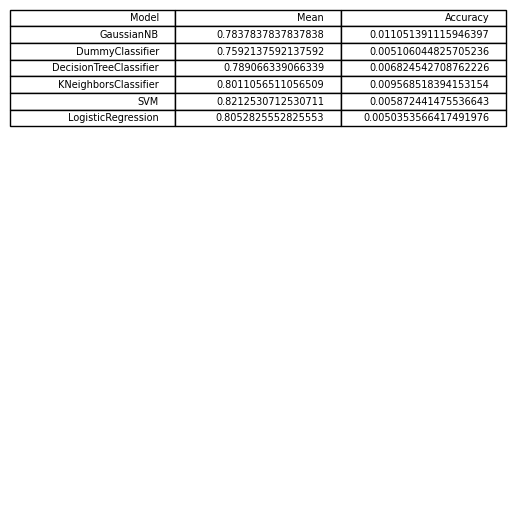

In [30]:
fig, axs = plt.subplots(1, 1)
plt.table(cellText=cells, loc="top")
axs.axis('off')
plt.plot()


#### Question 3.3.6

In [16]:
# TODO
group_number = 0 # TODO replace this with the number of your group on Brightspace
predictions = np.array([-1] * len(X_test)) # TODO replace this with you own predictions

pd.DataFrame(predictions).to_csv(f"{group_number}_classes_problem_census.txt", index=False, header=False)